In [1]:
import pandas as pd
import numpy as np
import lightgbm as lgb

In [2]:
xy = pd.read_parquet('XY_version1.parquet')

In [3]:
xy.head()

,year,area,avg_yield_maize_corn_1y,avg_yield_maize_corn_3y,avg_yield_maize_corn_6y,avg_yield_other_vegetables_fresh_nec_1y,avg_yield_other_vegetables_fresh_nec_3y,avg_yield_other_vegetables_fresh_nec_6y,avg_yield_potatoes_1y,avg_yield_potatoes_3y,...,Y_oil_palm_fruit,Y_other_vegetables_fresh_nec,Y_potatoes,Y_rice,Y_soya_beans,Y_sugar_beet,Y_sugar_cane,Y_tomatoes,Y_watermelons,Y_wheat
0,1983,Afghanistan,1665.8,1668.633333,1636.283333,6919.2,6846.166667,6561.216667,15511.4,15265.133333,...,NaN,7065.7,15764.7,2258.1,NaN,20000.0,19375.0,NaN,9754.9,1258.0
1,1984,Afghanistan,1664.1,1666.300000,1649.750000,7065.7,6959.033333,6775.366667,15764.7,15566.600000,...,NaN,7155.1,14444.4,2241.6,NaN,20000.0,19354.8,NaN,9630.0,1231.9
2,1985,Afghanistan,1661.2,1663.700000,1656.900000,7155.1,7046.666667,6897.800000,14444.4,15240.166667,...,NaN,7145.9,14090.9,2248.2,NaN,3333.3,19333.3,NaN,9556.7,1227.7
3,1986,Afghanistan,1665.2,1663.500000,1666.066667,7145.9,7122.233333,6984.200000,14090.9,14766.666667,...,NaN,7249.5,15866.7,2240.0,NaN,12500.0,20000.0,NaN,10058.8,1189.0
4,1987,Afghanistan,1687.5,1671.300000,1668.800000,7249.5,7183.500000,7071.266667,15866.7,14800.666667,...,NaN,7524.8,15500.0,2000.0,NaN,15000.0,20000.0,NaN,9952.9,1284.9


In [4]:
latlong  = pd.read_csv('coordinates_countries_full_209.csv')

In [5]:
latlong['area'] = latlong['Area'].str.replace(' ', '_')

In [6]:
latlong = latlong[['area', 'latitude', 'longitude']]

In [7]:
xy = xy.merge(latlong, on='area')

In [8]:
xy = pd.get_dummies(xy, columns=['area'])


In [10]:
xy.columns = (
    xy.columns
    .str.strip()             # remove leading/trailing spaces
    .str.replace(' ', '_')   # replace spaces
    .str.replace(r'[^A-Za-z0-9_]', '', regex=True)  # remove special chars
)

In [12]:
xy.columns.tolist()

['year',
 'avg_yield_maize_corn_1y',
 'avg_yield_maize_corn_3y',
 'avg_yield_maize_corn_6y',
 'avg_yield_other_vegetables_fresh_nec_1y',
 'avg_yield_other_vegetables_fresh_nec_3y',
 'avg_yield_other_vegetables_fresh_nec_6y',
 'avg_yield_potatoes_1y',
 'avg_yield_potatoes_3y',
 'avg_yield_potatoes_6y',
 'avg_yield_rice_1y',
 'avg_yield_rice_3y',
 'avg_yield_rice_6y',
 'avg_yield_sugar_cane_1y',
 'avg_yield_sugar_cane_3y',
 'avg_yield_sugar_cane_6y',
 'avg_yield_wheat_1y',
 'avg_yield_wheat_3y',
 'avg_yield_wheat_6y',
 'avg_yield_oil_palm_fruit_1y',
 'avg_yield_oil_palm_fruit_3y',
 'avg_yield_oil_palm_fruit_6y',
 'avg_yield_barley_1y',
 'avg_yield_barley_3y',
 'avg_yield_barley_6y',
 'avg_yield_soya_beans_1y',
 'avg_yield_soya_beans_3y',
 'avg_yield_soya_beans_6y',
 'avg_yield_sugar_beet_1y',
 'avg_yield_sugar_beet_3y',
 'avg_yield_sugar_beet_6y',
 'avg_yield_watermelons_1y',
 'avg_yield_watermelons_3y',
 'avg_yield_watermelons_6y',
 'avg_yield_cucumbers_and_gherkins_1y',
 'avg_yield_cuc

In [13]:
features_col =[
 'avg_yield_maize_corn_1y',
 'avg_yield_maize_corn_3y',
 'avg_yield_maize_corn_6y',
 'avg_yield_other_vegetables_fresh_nec_1y',
 'avg_yield_other_vegetables_fresh_nec_3y',
 'avg_yield_other_vegetables_fresh_nec_6y',
 'avg_yield_potatoes_1y',
 'avg_yield_potatoes_3y',
 'avg_yield_potatoes_6y',
 'avg_yield_rice_1y',
 'avg_yield_rice_3y',
 'avg_yield_rice_6y',
 'avg_yield_sugar_cane_1y',
 'avg_yield_sugar_cane_3y',
 'avg_yield_sugar_cane_6y',
 'avg_yield_wheat_1y',
 'avg_yield_wheat_3y',
 'avg_yield_wheat_6y',
 'avg_yield_oil_palm_fruit_1y',
 'avg_yield_oil_palm_fruit_3y',
 'avg_yield_oil_palm_fruit_6y',
 'avg_yield_barley_1y',
 'avg_yield_barley_3y',
 'avg_yield_barley_6y',
 'avg_yield_soya_beans_1y',
 'avg_yield_soya_beans_3y',
 'avg_yield_soya_beans_6y',
 'avg_yield_sugar_beet_1y',
 'avg_yield_sugar_beet_3y',
 'avg_yield_sugar_beet_6y',
 'avg_yield_watermelons_1y',
 'avg_yield_watermelons_3y',
 'avg_yield_watermelons_6y',
 'avg_yield_cucumbers_and_gherkins_1y',
 'avg_yield_cucumbers_and_gherkins_3y',
 'avg_yield_cucumbers_and_gherkins_6y',
 'avg_yield_tomatoes_1y',
 'avg_yield_tomatoes_3y',
 'avg_yield_tomatoes_6y',
 'avg_yield_bananas_1y',
 'avg_yield_bananas_3y',
 'avg_yield_bananas_6y',
 'avg_yield_cassava_fresh_1y',
 'avg_yield_cassava_fresh_3y',
 'avg_yield_cassava_fresh_6y',
 'rain_Jan',
 'rain_Feb',
 'rain_Mar',
 'rain_Apr',
 'rain_May',
 'rain_Jun',
 'rain_Jul',
 'rain_Aug',
 'rain_Sep',
 'rain_Oct',
 'rain_Nov',
 'rain_Dec',
 'avg_rain_1_3',
 'avg_rain_3_6',
 'avg_rain_6_9',
 'avg_rain_10_12',
 'avg_rain_1_12',
 'solar_Jan',
 'solar_Feb',
 'solar_Mar',
 'solar_Apr',
 'solar_May',
 'solar_Jun',
 'solar_Jul',
 'solar_Aug',
 'solar_Sep',
 'solar_Oct',
 'solar_Nov',
 'solar_Dec',
 'avg_solar_1_3',
 'avg_solar_3_6',
 'avg_solar_6_9',
 'avg_solar_10_12',
 'avg_solar_1_12',
 'temp_Jan',
 'temp_Feb',
 'temp_Mar',
 'temp_Apr',
 'temp_May',
 'temp_Jun',
 'temp_Jul',
 'temp_Aug',
 'temp_Sep',
 'temp_Oct',
 'temp_Nov',
 'temp_Dec',
 'avg_temp_1_3',
 'avg_temp_3_6',
 'avg_temp_6_9',
 'avg_temp_10_12',
 'avg_temp_1_12',
 'sum_rain_1_3',
 'sum_rain_3_6',
 'sum_rain_6_9',
 'sum_rain_10_12',
 'sum_rain_1_12',

 'latitude',
 'longitude',
 'area_Afghanistan',
 'area_Albania',
 'area_Algeria',
 'area_Angola',
 'area_Antigua_and_Barbuda',
 'area_Argentina',
 'area_Armenia',
 'area_Australia',
 'area_Austria',
 'area_Azerbaijan',
 'area_Bahamas',
 'area_Bangladesh',
 'area_Barbados',
 'area_Belarus',
 'area_Belgium',
 'area_BelgiumLuxembourg',
 'area_Belize',
 'area_Benin',
 'area_Bhutan',
 'area_Bolivia_Plurinational_State_of',
 'area_Bosnia_and_Herzegovina',
 'area_Botswana',
 'area_Brazil',
 'area_Bulgaria',
 'area_Burkina_Faso',
 'area_Burundi',
 'area_Cabo_Verde',
 'area_Cambodia',
 'area_Cameroon',
 'area_Canada',
 'area_Central_African_Republic',
 'area_Chad',
 'area_Chile',
 'area_China',
 'area_China_Taiwan_Province_of',
 'area_China_mainland',
 'area_Colombia',
 'area_Comoros',
 'area_Congo',
 'area_Costa_Rica',
 'area_Croatia',
 'area_Cuba',
 'area_Czechia',
 'area_Czechoslovakia',
 'area_Cte_dIvoire',
 'area_Democratic_Peoples_Republic_of_Korea',
 'area_Democratic_Republic_of_the_Congo',
 'area_Denmark',
 'area_Djibouti',
 'area_Dominica',
 'area_Dominican_Republic',
 'area_Ecuador',
 'area_Egypt',
 'area_El_Salvador',
 'area_Eritrea',
 'area_Eswatini',
 'area_Ethiopia',
 'area_Ethiopia_PDR',
 'area_Fiji',
 'area_France',
 'area_French_Guiana',
 'area_Gabon',
 'area_Gambia',
 'area_Georgia',
 'area_Germany',
 'area_Ghana',
 'area_Greece',
 'area_Grenada',
 'area_Guatemala',
 'area_Guinea',
 'area_GuineaBissau',
 'area_Guyana',
 'area_Haiti',
 'area_Honduras',
 'area_Hungary',
 'area_India',
 'area_Indonesia',
 'area_Iran_Islamic_Republic_of',
 'area_Iraq',
 'area_Israel',
 'area_Italy',
 'area_Jamaica',
 'area_Japan',
 'area_Jordan',
 'area_Kazakhstan',
 'area_Kenya',
 'area_Kuwait',
 'area_Kyrgyzstan',
 'area_Lao_Peoples_Democratic_Republic',
 'area_Lebanon',
 'area_Lesotho',
 'area_Libya',
 'area_Lithuania',
 'area_Luxembourg',
 'area_Madagascar',
 'area_Malawi',
 'area_Malaysia',
 'area_Maldives',
 'area_Mali',
 'area_Mauritania',
 'area_Mauritius',
 'area_Mexico',
 'area_Micronesia_Federated_States_of',
 'area_Montenegro',
 'area_Morocco',
 'area_Mozambique',
 'area_Myanmar',
 'area_Namibia',
 'area_Nepal',
 'area_Netherlands_Kingdom_of_the',
 'area_New_Caledonia',
 'area_New_Zealand',
 'area_Nicaragua',
 'area_Niger',
 'area_Nigeria',
 'area_North_Macedonia',
 'area_Oman',
 'area_Pakistan',
 'area_Panama',
 'area_Papua_New_Guinea',
 'area_Paraguay',
 'area_Peru',
 'area_Philippines',
 'area_Poland',
 'area_Portugal',
 'area_Puerto_Rico',
 'area_Qatar',
 'area_Republic_of_Korea',
 'area_Republic_of_Moldova',
 'area_Romania',
 'area_Russian_Federation',
 'area_Rwanda',
 'area_Runion',
 'area_Saint_Vincent_and_the_Grenadines',
 'area_Sao_Tome_and_Principe',
 'area_Saudi_Arabia',
 'area_Senegal',
 'area_Serbia',
 'area_Serbia_and_Montenegro',
 'area_Sierra_Leone',
 'area_Slovakia',
 'area_Slovenia',
 'area_Somalia',
 'area_South_Africa',
 'area_South_Sudan',
 'area_Spain',
 'area_Sri_Lanka',
 'area_Sudan',
 'area_Sudan_former',
 'area_Suriname',
 'area_Sweden',
 'area_Switzerland',
 'area_Syrian_Arab_Republic',
 'area_Tajikistan',
 'area_Thailand',
 'area_TimorLeste',
 'area_Togo',
 'area_Trinidad_and_Tobago',
 'area_Turkmenistan',
 'area_Trkiye',
 'area_USSR',
 'area_Uganda',
 'area_Ukraine',
 'area_United_Arab_Emirates',
 'area_United_Republic_of_Tanzania',
 'area_United_States_of_America',
 'area_Uruguay',
 'area_Uzbekistan',
 'area_Vanuatu',
 'area_Venezuela_Bolivarian_Republic_of',
 'area_Viet_Nam',
 'area_Yemen',
 'area_Yugoslav_SFR',
 'area_Zambia',
 'area_Zimbabwe']




In [14]:
 # 'Y_bananas',
 # 'Y_barley',
 # 'Y_cassava_fresh',
 # 'Y_cucumbers_and_gherkins',
 # 'Y_maize_corn',
 # 'Y_oil_palm_fruit',
 # 'Y_other_vegetables_fresh_nec',
 # 'Y_potatoes',
 # 'Y_rice',
 # 'Y_soya_beans',
 # 'Y_sugar_beet',
 # 'Y_sugar_cane',
 # 'Y_tomatoes',
 # 'Y_watermelons',
 # 'Y_wheat',

# Start Model Rice

In [34]:
xy_drop_na = xy[xy['Y_rice']>=0]

<Axes: >

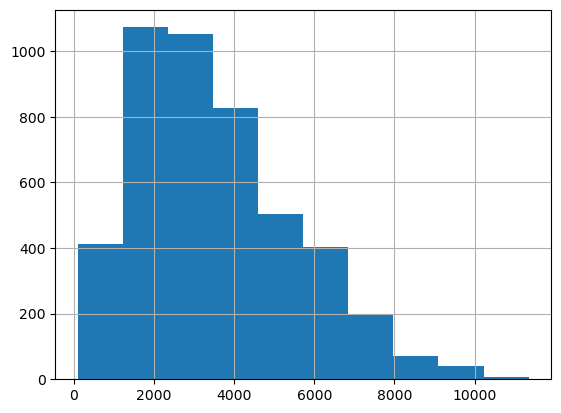

In [35]:
xy['Y_rice'].hist()

In [36]:
test_xy = xy_drop_na[xy_drop_na['year']>=2019]
train_and_validation_xy = xy_drop_na[xy_drop_na['year']<2019]

In [37]:
train_xy = train_and_validation_xy[train_and_validation_xy['year']<2014]
val_xy = train_and_validation_xy[train_and_validation_xy['year']>=2014]

In [38]:
import lightgbm as lgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
# Create LightGBM dataset


train_data = lgb.Dataset(train_xy[features_col], label=train_xy['Y_rice'])
val_data = lgb.Dataset(val_xy[features_col], label=val_xy['Y_rice'], reference=train_data)


In [40]:

# Set parameters
params = {
    'objective': 'regression',  # or 'binary'
    'metric': 'rmse',           # or 'auc' for classification
    'boosting_type': 'gbdt',
    'learning_rate': 0.03,
    'num_leaves': 16,
    'verbose': -1
}



# Train the model
model = lgb.train(
    params,
    train_data,
    num_boost_round=200,
    valid_sets=[train_data, val_data],
        callbacks=[
        lgb.early_stopping(stopping_rounds=10, verbose=True),
        lgb.log_evaluation(period=5)  # optional: print eval metrics
    ]
)

# Predict on validation
y_pred = model.predict(val_xy[features_col], num_iteration=model.best_iteration)



Training until validation scores don't improve for 10 rounds
[5]	training's rmse: 1615.68	valid_1's rmse: 1984.9
[10]	training's rmse: 1412.12	valid_1's rmse: 1737.53
[15]	training's rmse: 1239.95	valid_1's rmse: 1528.2
[20]	training's rmse: 1094.96	valid_1's rmse: 1349.78
[25]	training's rmse: 973.708	valid_1's rmse: 1199.03
[30]	training's rmse: 872.722	valid_1's rmse: 1070.77
[35]	training's rmse: 788.948	valid_1's rmse: 966.025
[40]	training's rmse: 720.064	valid_1's rmse: 880.45
[45]	training's rmse: 663.69	valid_1's rmse: 808.6
[50]	training's rmse: 618.031	valid_1's rmse: 751.554
[55]	training's rmse: 581.261	valid_1's rmse: 705.615
[60]	training's rmse: 551.683	valid_1's rmse: 669.365
[65]	training's rmse: 528.033	valid_1's rmse: 641.296
[70]	training's rmse: 508.989	valid_1's rmse: 617.616
[75]	training's rmse: 493.508	valid_1's rmse: 598.152
[80]	training's rmse: 481.11	valid_1's rmse: 582.795
[85]	training's rmse: 470.606	valid_1's rmse: 570.843
[90]	training's rmse: 462.057

In [42]:
rmse = np.sqrt(mean_squared_error(val_xy['Y_rice'], y_pred))
print("Validation RMSE:", rmse)

Validation RMSE: 526.5660483739449


In [ ]:
train_data = lgb.Dataset(train_and_validation_xy[features_col], label=train_and_validation_xy['Y_rice'])

In [45]:
# Train the model
# Set parameters
params = {
    'objective': 'regression',  # or 'binary'
    'metric': 'rmse',           # or 'auc' for classification
    'boosting_type': 'gbdt',
    'learning_rate': 0.03,
    'num_leaves': 16,
    'verbose': -1

    # min data in leaf 20
    # feature fract 0.7
    # row_fract. 0.7
}

model_final = lgb.train(
    params,
    train_data,
    num_boost_round=185,
)

In [46]:
y_pred_test = model_final.predict(test_xy[features_col])

In [47]:
rmse = np.sqrt(mean_squared_error(test_xy['Y_rice'], y_pred_test))
print("Validation RMSE:", rmse)

Validation RMSE: 517.9803795925842


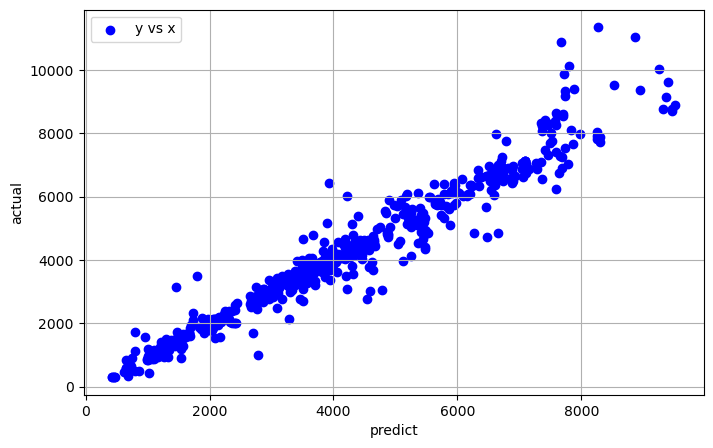

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Example DataFrame
df = pd.DataFrame()
df['actual'] = test_xy['Y_rice']
df['predict'] = y_pred_test

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(df['predict'], df['actual'], marker='o', linestyle='-', color='blue', label='y vs x')
plt.xlabel('predict')
plt.ylabel('actual')
plt.legend()
plt.grid(True)
plt.show()

In [50]:
mean_squared_error(test_xy['Y_rice'], y_pred_test)

268303.6736428776

In [52]:
model_final.feature_importance()

array([ 30,  37,  25,  25,  31,  23,  41,  31,  10, 490, 276, 162,  20,
        15,  19,  53,  11,  28,   0,   0,   0,  19,  19,  18,  45,   7,
        16,  11,   9,   7,  32,  15,  53,  15,   9,  57,  32,  34,  29,
        15,  10,  16,  22,  10,  24,  15,  23,  17,  25,  16,  22,  34,
        29,  18,  19,  14,   7,  14,  16,  36,  16,  23,  26,  19,  39,
        21,  11,   9,  10,  14,  30,  22,  40,  20,  14,   9,  12,  13,
        34,  18,  16,  16,  12,   8,   7,   5,  11,   8,  18,  10,  29,
        15,   4,   4,  11,   7,   0,   0,   0,   0,   0,  19,  11,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [53]:
importance = model_final.feature_importance(importance_type='gain')  # or 'split'
feature_names = model_final.feature_name()

# Create a DataFrame
fi_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importance
}).sort_values(by='importance', ascending=False)


In [56]:
fi_df

,feature,importance
9,avg_yield_rice_1y,1.017167e+11
10,avg_yield_rice_3y,7.840240e+10
11,avg_yield_rice_6y,5.707284e+09
78,avg_solar_1_12,6.377545e+08
70,solar_Sep,2.396989e+08
52,rain_Aug,1.870784e+08
32,avg_yield_watermelons_6y,1.821825e+08
15,avg_yield_wheat_1y,1.816978e+08
37,avg_yield_tomatoes_3y,1.653436e+08
35,avg_yield_cucumbers_and_gherkins_6y,1.497046e+08


In [55]:
pd.options.display.max_rows=300